In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read data

In [2]:
df = pd.read_csv(r"C:\Users\2021\Desktop\project\data\data_all.csv")

In [3]:
df.head()

,link,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign


In [4]:
df.shape

(694462, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694462 entries, 0 to 694461
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   link    694462 non-null  object
 1   label   694462 non-null  object
dtypes: object(2)
memory usage: 10.6+ MB


In [6]:
df.isnull().sum()

link     0
label    0
dtype: int64

In [7]:
df.loc[df.duplicated(),:].sum()

link     0.0
label    0.0
dtype: float64

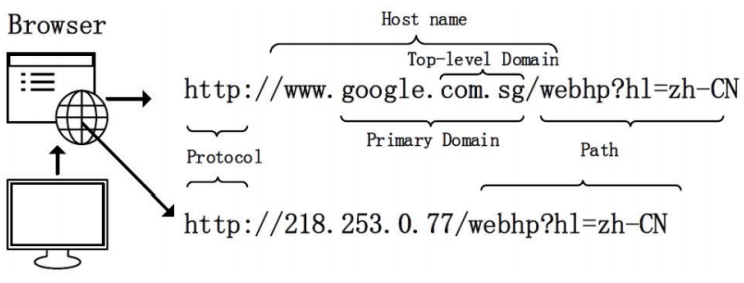

# DATA PREPROCESSING

## The following features will be extracted from the URL for classification

### 1- Entropy of URLs
### 2- Length Features
* Length Of Url
* Length of Hostname
* Length Of Path
* Length Of First Directory
* Length Of Top Level Domain

### 3- Count Features
* Count Of '-'
* Count Of '@'
* Count Of '?'
* Count Of '#'
* Count Of '+'
* Count Of '$'
* Count Of '!'
* Count Of '*'
* Count Of ','
* Count Of '//'
* Count Of '%'
* Count Of '.'
* Count Of '='
* Count Of 'http'
* Count Of 'https'
* Count Of 'www'
* Count Of Digits
* Count Of Letters
* Count Of Number Of Directories

### 4- Binary Features
* Use of IP or not
* Use of Shortening URL or not

In [8]:
def entropy(url):
    string = url.strip()
    prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
    entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
    return entropy

df["entropy"] = df['link'].apply(lambda i:entropy(i))

In [9]:
df.head(10)

,link,label,entropy
0,https://www.google.com,benign,-3.663533
1,https://www.youtube.com,benign,-3.762267
2,https://www.facebook.com,benign,-3.855389
3,https://www.baidu.com,benign,-3.880180
4,https://www.wikipedia.org,benign,-3.813661
5,https://www.reddit.com,benign,-3.754442
6,https://www.yahoo.com,benign,-3.558519
7,https://www.google.co.in,benign,-3.740602
8,https://www.qq.com,benign,-3.461320
9,https://www.amazon.com,benign,-3.697846


In [10]:
# !pip install tld

In [11]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [12]:
## example ##
o = urlparse(df["link"][0])

In [13]:
print(o)

ParseResult(scheme='https', netloc='www.google.com', path='', params='', query='', fragment='')


In [14]:
#Length of URL
df['url_length'] = df['link'].apply(lambda i: len(str(i)))

In [15]:
df.head()

,link,label,entropy,url_length
0,https://www.google.com,benign,-3.663533,22
1,https://www.youtube.com,benign,-3.762267,23
2,https://www.facebook.com,benign,-3.855389,24
3,https://www.baidu.com,benign,-3.880180,21
4,https://www.wikipedia.org,benign,-3.813661,25


In [16]:
#Hostname Length
df['hostname_length'] = df['link'].apply(lambda i: len(urlparse(i).netloc))

In [17]:
df.head()

,link,label,entropy,url_length,hostname_length
0,https://www.google.com,benign,-3.663533,22,14
1,https://www.youtube.com,benign,-3.762267,23,15
2,https://www.facebook.com,benign,-3.855389,24,16
3,https://www.baidu.com,benign,-3.880180,21,13
4,https://www.wikipedia.org,benign,-3.813661,25,17


In [18]:
#Path Length
df['path_length'] = df['link'].apply(lambda i: len(urlparse(i).path))

In [19]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length
0,https://www.google.com,benign,-3.663533,22,14,0
1,https://www.youtube.com,benign,-3.762267,23,15,0
2,https://www.facebook.com,benign,-3.855389,24,16,0
3,https://www.baidu.com,benign,-3.880180,21,13,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0


In [20]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['link'].apply(lambda i: fd_length(i))

In [21]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,-3.663533,22,14,0,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0


In [22]:
#Length of Top Level Domain

df['tld'] = df['link'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [23]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3


In [24]:
print(df["link"][0])

https://www.google.com


# Count Features


In [25]:
df['count-'] = df['link'].apply(lambda i: i.count('-'))

In [26]:
df['count@'] = df['link'].apply(lambda i: i.count('@'))

In [27]:
df['count?'] = df['link'].apply(lambda i: i.count('?'))

In [28]:
df['count%'] = df['link'].apply(lambda i: i.count('%'))

In [29]:
df['count.'] = df['link'].apply(lambda i: i.count('.'))

In [30]:
df['count='] = df['link'].apply(lambda i: i.count('='))

In [31]:
df['count#'] = df['link'].apply(lambda i: i.count('#'))

In [32]:
df['count+'] = df['link'].apply(lambda i: i.count('+'))

In [33]:
df['count$'] = df['link'].apply(lambda i: i.count('$'))

In [34]:
df['count!'] = df['link'].apply(lambda i: i.count('!'))

In [35]:
df['count*'] = df['link'].apply(lambda i: i.count('*'))

In [36]:
df['count,'] = df['link'].apply(lambda i: i.count(','))

In [37]:
df['count//'] = df['link'].apply(lambda i: i.count('//'))

In [38]:
df['count-http'] = df['link'].apply(lambda i : i.count('http'))


In [39]:
df['count-https'] = df['link'].apply(lambda i : i.count('https'))

In [40]:
df['count-www'] = df['link'].apply(lambda i: i.count('www'))

In [41]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['link'].apply(lambda i: digit_count(i))

In [42]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['link'].apply(lambda i: letter_count(i))

In [43]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['link'].apply(lambda i: no_of_dir(i))

# Data after extracting Count Features

In [44]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count!,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3,0,...,0,0,0,1,1,1,1,0,17,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3,0,...,0,0,0,1,1,1,1,0,18,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3,0,...,0,0,0,1,1,1,1,0,19,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3,0,...,0,0,0,1,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3,0,...,0,0,0,1,1,1,1,0,20,0


In [45]:
print(df["link"][0])

https://www.google.com


# Binary Features

In [46]:
print(df["link"][500])

https://www.thebalance.com


In [47]:
import re

In [48]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        
        return -1
    else:
       
        return 1
df['use_of_ip'] = df['link'].apply(lambda i: having_ip_address(i))

In [49]:
df.tail()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
694457,http://bellmobility001-support.com/,malicious,-4.128724,35,27,1,0,com,3,1,...,0,0,1,1,0,0,3,26,1,1
694458,https://ca-transfer.info/,malicious,-3.863465,25,16,1,0,info,4,1,...,0,0,1,1,1,0,0,19,1,1
694459,http://box2l.com,malicious,-3.625000,16,9,0,0,com,3,0,...,0,0,1,1,0,0,1,11,0,1
694460,https://bellmobility001-support.com,malicious,-4.150293,35,27,0,0,com,3,1,...,0,0,1,1,1,0,3,27,0,1
694461,https://bellmobile01-supports.com/,malicious,-4.071894,34,25,1,0,com,3,1,...,0,0,1,1,1,0,2,26,1,1


In [50]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1

In [51]:
df['short_url'] = df['link'].apply(lambda i: shortening_service(i))

In [52]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['link'].apply(lambda i: suspicious_words(i))

# Data after extracting Binary Features

In [53]:
df.head(10)

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3,0,...,1,1,1,1,0,17,0,1,1,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3,0,...,1,1,1,1,0,18,0,1,1,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3,0,...,1,1,1,1,0,19,0,1,1,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3,0,...,1,1,1,1,0,16,0,1,1,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3,0,...,1,1,1,1,0,20,0,1,1,0
5,https://www.reddit.com,benign,-3.754442,22,14,0,0,com,3,0,...,1,1,1,1,0,17,0,1,-1,0
6,https://www.yahoo.com,benign,-3.558519,21,13,0,0,com,3,0,...,1,1,1,1,0,16,0,1,1,0
7,https://www.google.co.in,benign,-3.740602,24,16,0,0,co.in,5,0,...,1,1,1,1,0,18,0,1,1,0
8,https://www.qq.com,benign,-3.461320,18,10,0,0,com,3,0,...,1,1,1,1,0,13,0,1,1,0
9,https://www.amazon.com,benign,-3.697846,22,14,0,0,com,3,0,...,1,1,1,1,0,17,0,1,1,0


In [54]:
df.tail(20)

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url
694442,http://ks.almeradio.com/1064ffe4-702e-4bc4-a98...,malicious,-5.021702,79,16,37,36,com,3,6,...,1,1,0,0,23,42,1,1,1,0
694443,http://couponallinin.site/,malicious,-3.738149,26,18,1,0,site,4,0,...,1,1,0,0,0,21,1,1,1,0
694444,http://ks.almeradio.com//'https://www.google.c...,malicious,-4.108438,50,16,27,0,com,3,0,...,3,2,1,1,0,35,5,1,1,0
694445,https://bellmobile01-supports.com//deposit.php,malicious,-4.066615,46,25,13,0,com,3,1,...,2,1,1,0,2,36,2,1,1,0
694446,http://170.130.55.53/,malicious,-3.332095,21,13,1,0,None,-1,0,...,1,1,0,0,10,4,1,-1,1,0
694447,http://efdkg.trlmbnftrefund.com/,malicious,-4.077820,32,24,1,0,com,3,0,...,1,1,0,0,0,26,1,1,1,0
694448,https://bellmobile01-supports.com/deposit.php,malicious,-4.074643,45,25,12,11,com,3,1,...,1,1,1,0,2,36,1,1,1,0
694449,https://netfl.n0e3t.com/,malicious,-3.803509,24,15,1,0,com,3,0,...,1,1,1,0,2,16,1,1,-1,0
694450,http://ks.almeradio.com/c78e1be3-8454-45f0-a82...,malicious,-5.061515,79,16,37,36,com,3,6,...,1,1,0,0,23,42,1,1,1,0
694451,http://intimeintimeinc.site/,malicious,-3.257924,28,20,1,0,site,4,0,...,1,1,0,0,0,23,1,1,1,0


In [55]:
df.shape

(694462, 31)

In [56]:
df.to_csv(r"C:\Users\2021\Desktop\project\data\data_preprocessing.csv",index=False)

# Data Visualization

<AxesSubplot:>

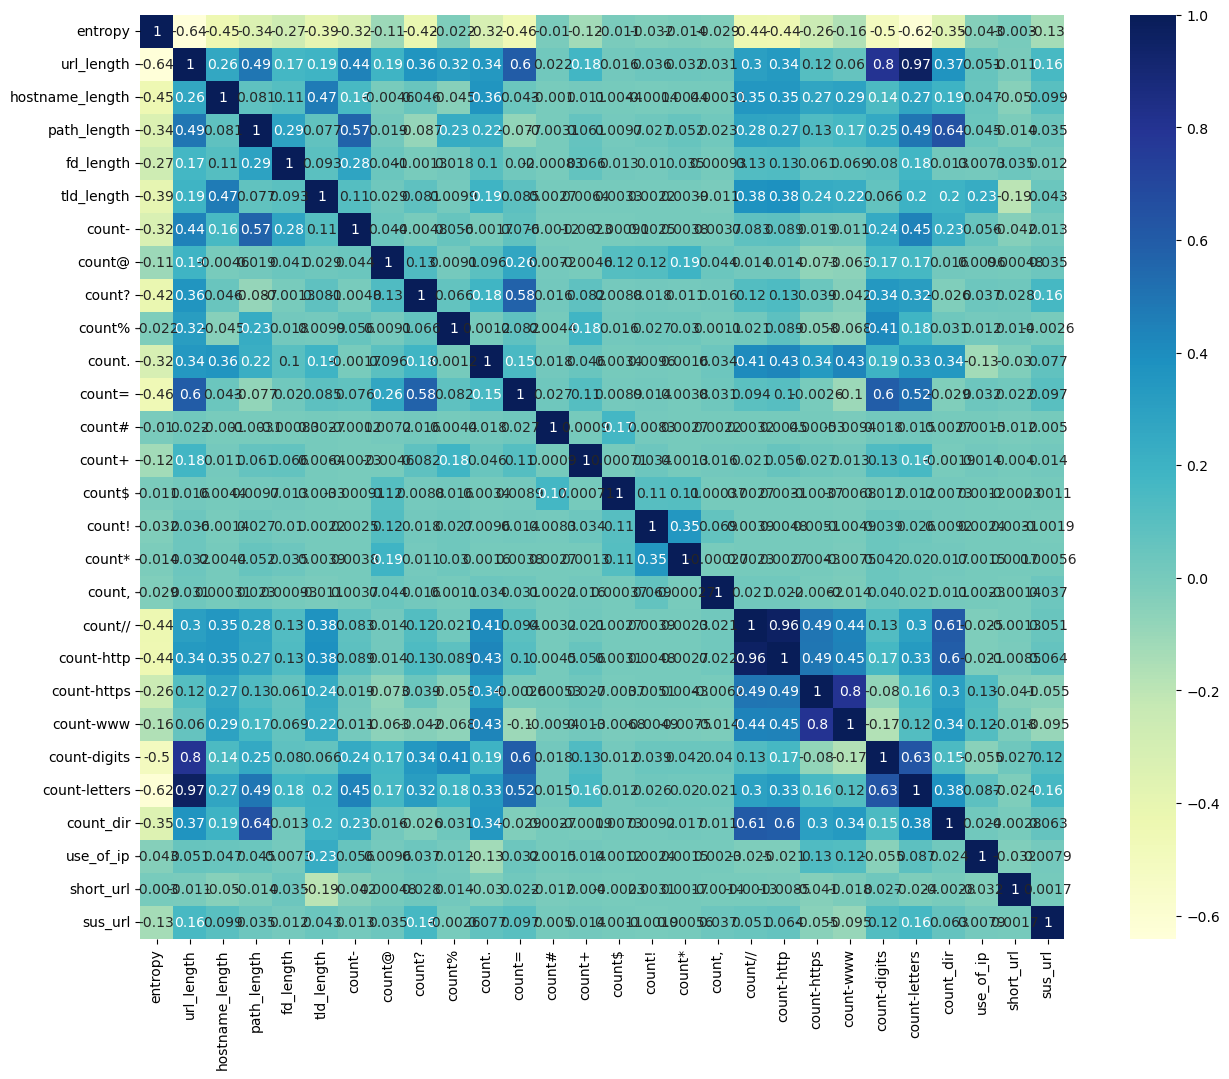

In [57]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(17,12))
# plt.figure(figsize=(14, 14))
dat_cor = df.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True)

Text(0, 0.5, 'Number Of URLs')

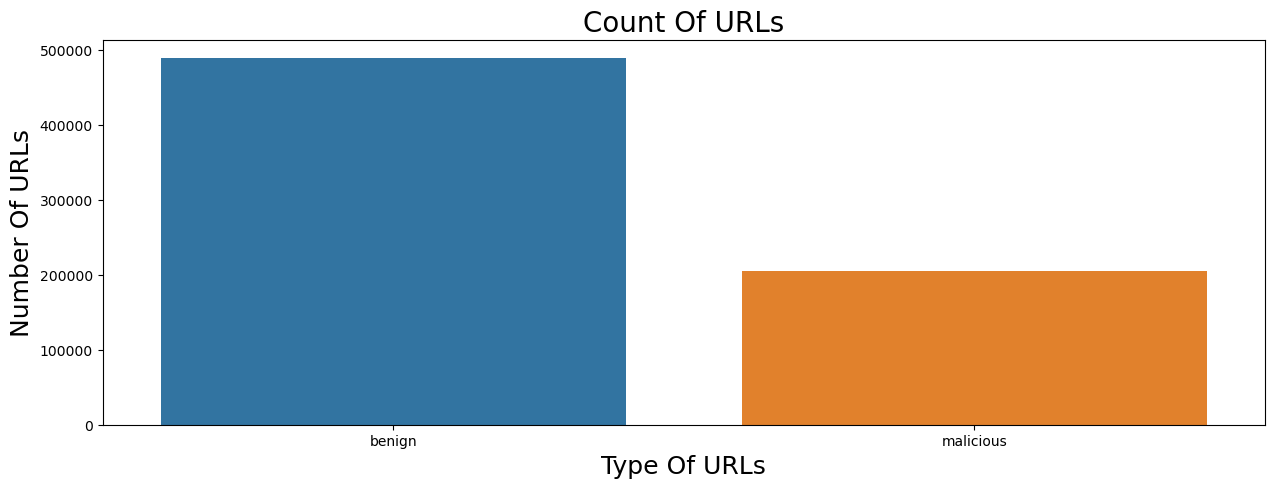

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [59]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Percent Of Malicious URLs:29.55 %
Percent Of Benign URLs:70.45 %
